# Clustering

El análisis de conglomerados o *clustering* es una de las técnicas de aprendizaje no supervisado más populares.

**Objetivo**: agrupar las distintas observaciones en diferentes *clusters* o grupos. Las muestras dentro del mismo *cluster* deberían de ser más parecidas entre si que las muestras que pertenecen a otros *clusters*

![](../img/clustering.gif)

## K-means

K-means es un algoritmo iterativo que intenta separar las muestras en grupos disjuntos (una muestra no puede estar en más de un grupo)

Para ejecutar el algoritmos es necesario especificar de antemano el número de clústers $K$

La idea detrás de K-means es que una buena agrupación es aquella donde la **varianza intra-cluster** es lo más pequeña posible. Intuitivamente, esto es una medida de cómo de diferentes son las distintas observaciones dentro de un clúster.

Existen muchas formas de definir el concepto de **varianza intra-cluster** (también conocido como **inercia**), pero el más popular es el basado en la distancia Euclidea:

$$||x - \mu_j||^2$$

donde $\mu_j$ es la media de las muestras en el clúster $j$, también conocida como *centroide*.

Por tanto, K-means agrupa las $n$ muestras de la matriz $X$ en $K$ clústers (definidos por su centroide) minimizando las distancias anteriores:

$$min_{\mu_j} \sum_{i=0}^{n} ||x_i - \mu_j||^2$$

Dado un valor para $K$, el algoritmo realiza los siguientes pasos:

1. Generar $K$ centroides

2. Asignar observaciones a su clúster, calculando las distancias

3. Calcular los nuevos centroides para cada clúster

4. Repetir 2 y 3 hasta convergencia


![](../img/kmeansViz.png)


Falta por definir dos detalles para ejecutar el algoritmo:

1. Valor de $K$

2. Una forma de inicializar los centroides

Para seleccionar el valor de $K$, algunas aplicaciones comerciales ya vienen con un valor de $K$ definido. Por ejemplo, una empresa quiere agrupar a sus clientes en 3 grupos de acuerdo con los datos de compras. De lo contrario hay que probar con varios valores y evaluar los resultados. Veremos algún ejemplo más adelante, aunque es muy complicado medir con precisión que unos clústers son mejores que otros.

### Ejemplo

Vamos a usar datos de usuarios de un centro comercial, disponibles en [Kaggle](https://www.kaggle.com/shwetabh123/mall-customers):

In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
mall = pd.read_csv("../data/Mall_Customers.csv")
mall.head()

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

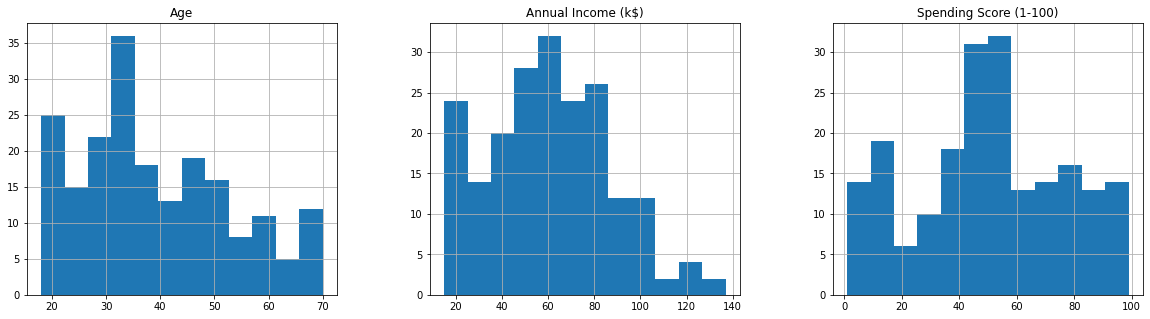

In [51]:
mall[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].hist(figsize=(20, 5), bins=12, layout=(1, 3));

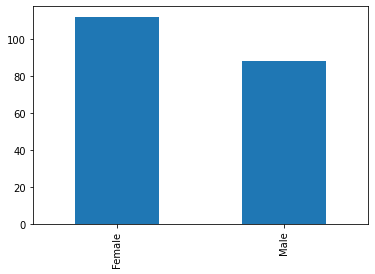

In [53]:
mall["Genre"].value_counts().plot(kind="bar");

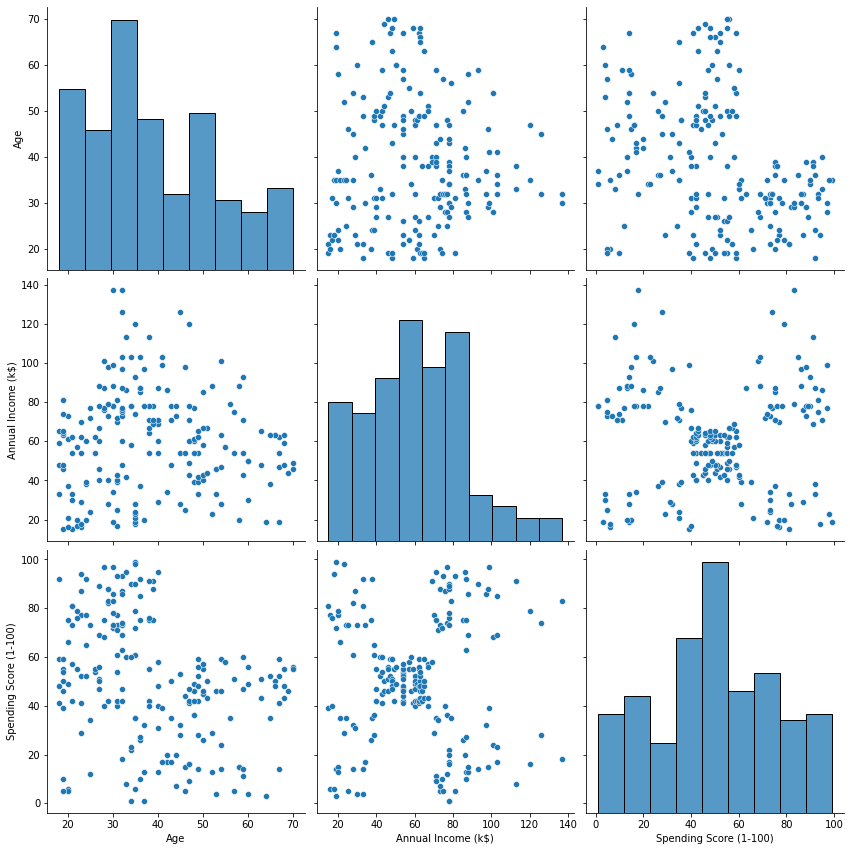

In [5]:
sns.pairplot(mall.drop(columns="CustomerID"), height=4);

In [6]:
from sklearn.cluster import KMeans

X = mall[["Age", "Spending Score (1-100)"]]

km = KMeans(n_clusters=2, random_state=0)
km.fit(X)

KMeans(n_clusters=2, random_state=0)

In [7]:
km.labels_
# o alternativamente
km.predict(X)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int32)

In [8]:
km.cluster_centers_

array([[46.16521739, 32.88695652],
       [28.95294118, 73.62352941]])

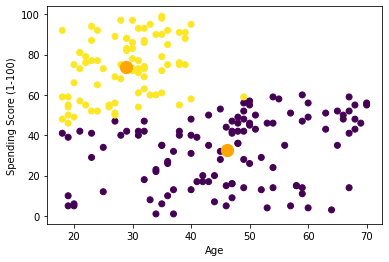

In [9]:
plt.scatter(X["Age"], X["Spending Score (1-100)"], c=km.labels_);
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=150, color="orange")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)");

In [10]:
km5 = KMeans(n_clusters=5, random_state=0)
labels = km5.fit_predict(mall[["Annual Income (k$)", "Spending Score (1-100)"]])

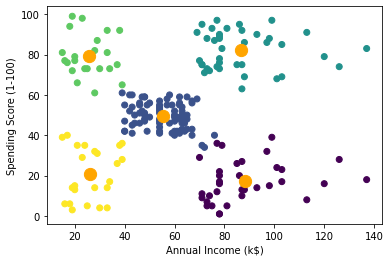

In [11]:
plt.scatter(mall["Annual Income (k$)"], mall["Spending Score (1-100)"], c=labels);
plt.scatter(km5.cluster_centers_[:, 0], km5.cluster_centers_[:, 1], s=150, color="orange")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)");

#### Ejercicio

1. Cargar el conjunto de datos `iris.csv`, que contiene 150 observaciones de distintos tipos de plantas iris

2. Realizar un gráfico de dispersión de todos los pares de variables

3. Estimar el número de clústers para cada par de variables visualmente, usando el gráfico de dispersión

4. Agrupar los datos en clústers usando el valor del punto anterior para dos variables de vuestra elección (las que presenten una clusterización más clara)

5. Representar gráficamente el gráfico de dispersión, coloreando los puntos con los valores de las etiquetas de los clústeres

### Visualizar agrupaciones de más de 2 variables

Una visualización muy útil son los gráficos tipo "radar" (también llamados *spyder plots*). Vamos a ver como hacer este tipo de gráficos con Plotly (más ejemplos en la [documentación](https://plotly.com/python/polar-chart/)):

In [12]:
import plotly.express as px

k = 5
X = mall[["Annual Income (k$)", "Spending Score (1-100)", "Age"]]

km = KMeans(n_clusters=k).fit(X)

In [13]:
km.cluster_centers_.ravel()

array([86.53846154, 82.12820513, 32.69230769, 87.75      , 17.58333333,
       40.66666667, 26.30434783, 20.91304348, 45.2173913 , 26.30434783,
       78.56521739, 25.52173913, 55.29113924, 49.56962025, 43.08860759])

In [14]:
np.tile(X.columns, km.cluster_centers_.shape[0])

array(['Annual Income (k$)', 'Spending Score (1-100)', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)', 'Age',
       'Annual Income (k$)', 'Spending Score (1-100)', 'Age'],
      dtype=object)

In [15]:
np.repeat(range(k), km.cluster_centers_.shape[1])

array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [16]:
df = pd.DataFrame({
    "centers": km.cluster_centers_.ravel(), 
    "names": np.tile(X.columns, km.cluster_centers_.shape[0]),
    "labels": np.repeat(range(k), km.cluster_centers_.shape[1]),
})

df

centers                   names  labels
0   86.538462      Annual Income (k$)       0
1   82.128205  Spending Score (1-100)       0
2   32.692308                     Age       0
3   87.750000      Annual Income (k$)       1
4   17.583333  Spending Score (1-100)       1
5   40.666667                     Age       1
6   26.304348      Annual Income (k$)       2
7   20.913043  Spending Score (1-100)       2
8   45.217391                     Age       2
9   26.304348      Annual Income (k$)       3
10  78.565217  Spending Score (1-100)       3
11  25.521739                     Age       3
12  55.291139      Annual Income (k$)       4
13  49.569620  Spending Score (1-100)       4
14  43.088608                     Age       4

In [17]:
px.line_polar(df, r="centers", theta="names", color="labels", line_close=True)

In [18]:
df = pd.DataFrame(km.cluster_centers_, columns=X.columns)
df_long = df.unstack().reset_index()
df

Annual Income (k$)  Spending Score (1-100)        Age
0           86.538462               82.128205  32.692308
1           87.750000               17.583333  40.666667
2           26.304348               20.913043  45.217391
3           26.304348               78.565217  25.521739
4           55.291139               49.569620  43.088608

In [19]:
df_long

level_0  level_1          0
0       Annual Income (k$)        0  86.538462
1       Annual Income (k$)        1  87.750000
2       Annual Income (k$)        2  26.304348
3       Annual Income (k$)        3  26.304348
4       Annual Income (k$)        4  55.291139
5   Spending Score (1-100)        0  82.128205
6   Spending Score (1-100)        1  17.583333
7   Spending Score (1-100)        2  20.913043
8   Spending Score (1-100)        3  78.565217
9   Spending Score (1-100)        4  49.569620
10                     Age        0  32.692308
11                     Age        1  40.666667
12                     Age        2  45.217391
13                     Age        3  25.521739
14                     Age        4  43.088608

In [20]:
px.line_polar(df_long, r=0, theta="level_0", color="level_1", line_close=True)

#### Ejercicio

1. Repetir la clusterización del dataset `iris` pero con las 4 variables con $k=3$

2. Realizar un gráfico de tipo radar representando los centroides de las agrupaciones finales

## Inicialización de centroides

### Inicialización aleatoria
- Para inicializar los centroides, lo más sencillo es escoger $K$ muestras aleatoriamente
- Dados uns centroides y suficiente tiempo, K-Means siempre converge a una solución, pero esta puede cambiar (mínimo local)
- Es habitual ejecutar K-Means varias veces con distintas inicializaciones, para mejorar la estabilidad



### Inicialización k-means++

Se eligen los centroides de forma inteligente para evitar malas soluciones locales y mejorar la velocidad de convergencia

Pseudocódigo:

1. Elegir el primer centroide de forma aleatoria entre las muestras

2. Calcular la distancia entre cada muestra $x$ (no elegida como centroide) y el centroide más cercano

3. Elegir un nuevo centroide pero con probabilidad proporcional a la distancia

4. Repetir 2 y 3 hasta seleccionar $K$ centroides iniciales

El resultado es que los centroides están en general muy separados entre si, obteniendo mejores resultados que la inicialización aleatoria

Ventajas:

- Mejora en eficiencia

- Menor probabilidad de que K-Means converja a un mínimo local con "malos" clusters

Desventajas

La principal desventaja es el mayor coste computacional, comparado con elegir simplemente $K$ centroides al azar. Sin embargo, en la práctica esto se compensa con menores tiempos de convergencia


Referencia: [“k-means++: The advantages of careful seeding”](http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf). Arthur, David, and Sergei Vassilvitskii, Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms, Society for Industrial and Applied Mathematics (2007)

#### Ejemplo

Por defecto, scikit-learn usa la inicialización `k-means++` y ejecuta el algoritmo 10 veces. Esto se puede cambiar usando los parámetros:

 - `init`: método de inicialización
 - `n_init`: número de veces que se ejecuta el algoritmo con diferentes centroides
 
Estos parámetros se pueden cambiar, aunque es recomendable usar los valores por defecto (a no ser que tengamos una muestra muy grande)

In [21]:
km = KMeans(n_clusters=2, random_state=0, init="random", n_init=1)
km.fit(mall[["Age", "Spending Score (1-100)"]])

KMeans(init='random', n_clusters=2, n_init=1, random_state=0)

#### Ejercicio

1. Continuando con el ejemplo anterior, ver la diferencia entre las dos inicializaciones de forma visual. Importante usar `n_init=1` para que los posibles efectos de la inicialización aleatoria no se enmascaren al ejecutar KMeans múltiples veces

## Elección del valor de K

Como ya hemos mencionado, algunas aplicaciones de clustering ya tienen un valor de $K$ de interés para segmentar sus muestras.
Si no es el caso, no siempre se pueden hacer gráficos como los del ejemplo anterior, ya que es común tener más de dos variables.

### Método Elbow

Por tanto, en el caso general podemos recurrir al método "elbow". Esta heurística consiste, en líneas generales, en ejecutar K-Means con valores crecientes de $K$ y realizar una gráfica de la distancia total de los puntos a su centroide:

![](../img/elbow.jpg)

La idea es seleccionar el valor de $K$ de forma que añadiendo un nuevo clúster los resultados no mejoran de forma significativamente . La intuición es que un mayor número de clústers siempre va a disminuir la incercia, pero llegado a un punto estamos "sobreajustando" a los datos.

In [22]:
dist = []
for k in range(1, 16):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(mall[["Age", "Spending Score (1-100)"]])
    dist.append(km.inertia_)

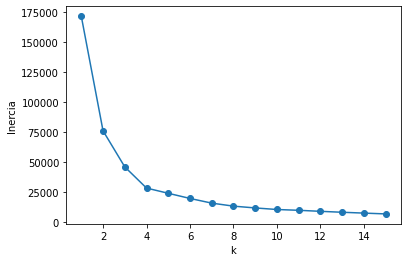

In [23]:
plt.plot(range(1, 16), dist, 'o-');
plt.xlabel("k")
plt.ylabel("Inercia");

El gráfico anterior nos indica que el valor de $k$ debería de ser 4. Vamos a ver la diferencia:

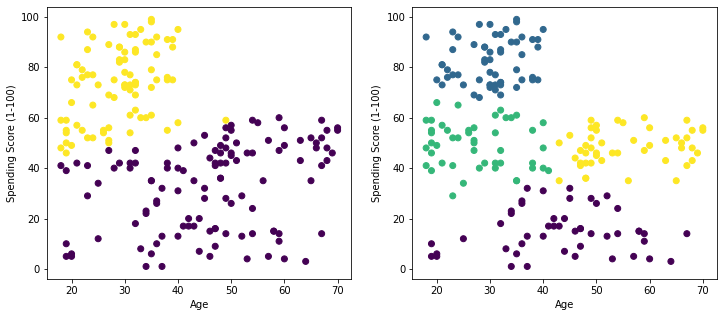

In [24]:
km2 = KMeans(n_clusters=2, random_state=0).fit(mall[["Age", "Spending Score (1-100)"]])
km4 = KMeans(n_clusters=4, random_state=0).fit(mall[["Age", "Spending Score (1-100)"]])

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(X["Age"], X["Spending Score (1-100)"], c=km2.labels_)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)");

plt.subplot(1, 2, 2)
plt.scatter(X["Age"], X["Spending Score (1-100)"], c=km4.labels_);
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)");

Vamos a probar ahora con las otras variables:

In [25]:
dist = []
for k in range(1, 16):
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(mall[["Annual Income (k$)", "Spending Score (1-100)"]])
    dist.append(km.inertia_)

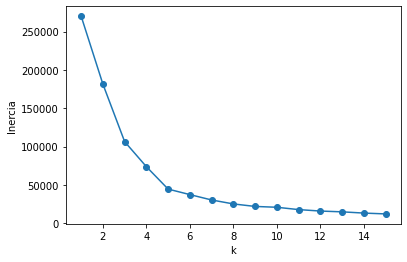

In [26]:
plt.plot(range(1, 16), dist, 'o-');
plt.xlabel("k")
plt.ylabel("Inercia");

En este caso el "codo" está en $k=5$, como ya se intuía viendo el gráfico de dispersión.

#### Ejercicio

Con los datos de iris, aplicar el método "elbow" para intentar obtener de forma automática el número de clústeres

### Estadístico gap

De forma similar al método "elbow", se calcula la suma de la varianza intra-clúster para distintos valores de $k$. A continuación se calcula una distribución de referencia con datos aleatorios, y se selecciona el valor de $k$ que tiene la máxima desviación entre ambos.

Este procedimiento no está implementado en scikit-learn, pero existe una librería [`gap-stat`](https://github.com/milesgranger/gap_statistic). 

Referencia: [Tibshirani et al. (2001). Estimating the number of clusters in a data ser via the gap statistic](https://statweb.stanford.edu/~gwalther/gap)


Existen otros métodos para elegir el valor de $K$. Veremos algunos en la sección de evaluar la calidad de los clústeres. Una buena referencia es: [Chunhui Yuan and Haitao Yang (2019). Research on K-Value Selection Method of K-Means Clustering Algorithm](https://www.mdpi.com/2571-8800/2/2/16/htm)

In [54]:
%pip install gap-stat

Note: you may need to restart the kernel to use updated packages.


In [55]:
from gap_statistic import OptimalK

X = mall[["Annual Income (k$)", "Spending Score (1-100)"]].to_numpy().astype("float")
opt = OptimalK(parallel_backend="joblib", n_jobs=4)

k = opt(X, cluster_array=np.arange(1, 16))
labels = KMeans(n_clusters=k, random_state=0).fit_predict(X)

print(k)

6


In [56]:
opt.gap_df

n_clusters  gap_value           gap*  ref_dispersion_std        sk  \
0          1.0   0.386427  127693.289083        16480.301610  0.047666   
1          2.0   0.209000   43253.246160        14504.459194  0.072510   
2          3.0   0.310462   38905.223998         7465.722957  0.058588   
3          4.0   0.322439   28229.304664         3688.903096  0.042062   
4          5.0   0.056980    4675.654226         6270.767085  0.089967   
5          6.0   0.599743   30969.175977         3821.853299  0.065454   
6          7.0   0.559551   25651.228922         5319.807519  0.106848   
7          8.0   0.466407   18897.191720         2016.414588  0.046589   
8          9.0   0.275636   10361.611683         2429.056356  0.066976   
9         10.0   0.591888   17055.281934          945.327773  0.028528   
10        11.0   0.386320   11532.683831          358.582747  0.011474   
11        12.0   0.306840    8483.181565         3090.136461  0.114462   
12        13.0   0.267998    6182.790911         1345.343674  0.058455   
13        14.0   0.525619   10745.037812          375.103874  0.016520   
14        15.0   0.502351    9516.419480          394.614708  0.018900   

              sk*      diff          diff*  
0   148670.447267  0.249937  137117.965431  
1    52677.922508 -0.042874   50091.560483  
2    45743.538321  0.030085   43549.447648  
3    32873.528314  0.355426   32585.760732  
4     9032.110294 -0.477309    9737.879800  
5    36031.401552  0.147040   35567.705120  
6    30249.758065  0.139734   28698.505987  
7    21944.468785  0.257746   20824.507923  
8    12288.927886 -0.287723   13030.301169  
9    19723.971420  0.217042   18845.829839  
10   13323.231737  0.193941   13474.684139  
11   10425.181873  0.097297    9606.721521  
12    7306.330866 -0.241101    7852.611965  
13   12414.858866  0.042168   12226.676372  
14   10998.058040       NaN            NaN

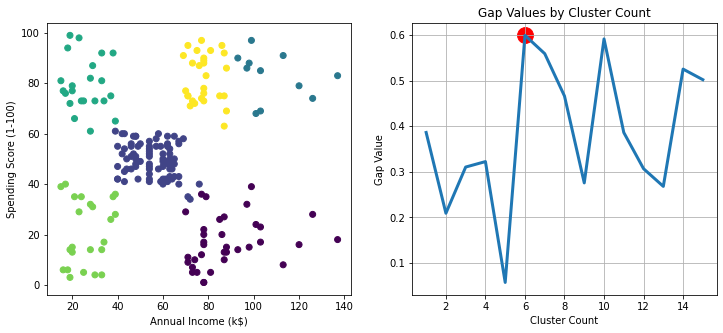

In [57]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.scatter(mall["Annual Income (k$)"], mall["Spending Score (1-100)"], c=labels)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)");

plt.subplot(1, 2, 2)
plt.plot(opt.gap_df["n_clusters"], opt.gap_df["gap_value"], linewidth=3)
plt.scatter(k, opt.gap_df.loc[opt.gap_df["n_clusters"] == k, "gap_value"], s=250, c="r")
plt.grid(True)
plt.xlabel("Cluster Count")
plt.ylabel("Gap Value")
plt.title("Gap Values by Cluster Count");

## Hipótesis de K-Means

Implícitamente, el problema de optimización de K-Means  esta realizando varias hipótesis sobre los datos:

1. la varianza de cada variable es esférica (datos isotrópicos)

2. todas las variables tienen la misma varianza

3. todos los clústers tienen aproximadamente el mismo tamaño

Si alguna de las hipótesis anteriores falla, K-Means puede devolver resultados inesperados o poco intuitivos. Un ejemplo se puede ver en la documentación de scikit-learn: [Demonstration of k-means assumptions](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py)

![](../img/kmeans_assumptions.png)

En el último gráfico, a pesar de que los clusters tienen distinto tamaño k-means devuelve resultados "correctos". Sin embargo, es sencillo construir conjuntos de datos artificiales donde esto no se cumple:

![](../img/different_sizes_kmeans-1.png)

Fuente: David Robinson. [K-means clustering is not a free lunch](http://varianceexplained.org/r/kmeans-free-lunch/)

### Escalado de datos

Es habitual asumir que todas las variables deberían de tener la misma importancia a la hora de crear los clústers. Sin embargo, por el hecho de minimizar las distancias, variables con valores más altos van a tener valores más altos de inercia. Por tanto, el algoritmo tiende a reducir la distancias en estas dimensiones primero.

En resumen, es recomendable escalar todas las variables a media 0 y varianza 1. Es **importante** destacar que esto no soluciona por completo los problemas anteriores, ya que k-means asume que todos los clústers (de forma independiente) tienen la misma varianza en todas las variables.

En este caso estamos únicamente escalando los datos en conjunto, ya que no se conocen los clústers de antemano.

Vamos a verlo con un ejemplo ([fuente](https://dmitrijskass.netlify.app/2019/10/22/effect-of-not-standardizing-variables-in-k-means-clustering/) de los datos)


In [30]:
groceries = pd.read_csv("../data/groceries.csv")
groceries

Customer  Caviar (kg)  Bread (kg)
0    Artis          0.0        10.0
1    Baiba          0.1         9.0
2  Cintija          1.0         7.5
3   Dainis          1.1         4.5

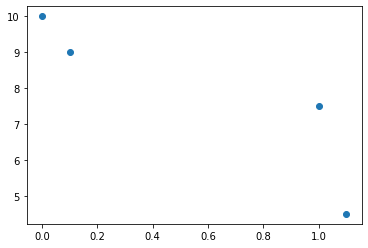

In [31]:
plt.scatter(groceries["Caviar (kg)"], groceries["Bread (kg)"]);

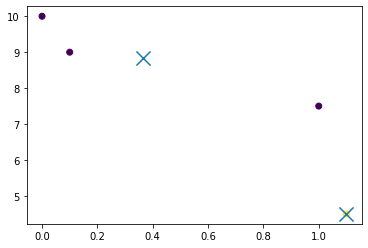

In [32]:
km = KMeans(n_clusters=2).fit(groceries[["Caviar (kg)", "Bread (kg)"]])
plt.scatter(groceries["Caviar (kg)"], groceries["Bread (kg)"], c=km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker="x", s=200);

Vamos a estandarizar cada variable para que tenga media 0 y varianza 1 usando la clase `StandardScaler` de scikit-learn (ver notebook `preprocessing.ipynb` para más información):

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [58]:
scaler = StandardScaler()
X_std = scaler.fit_transform(groceries[["Caviar (kg)", "Bread (kg)"]])

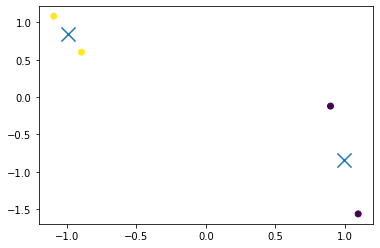

In [35]:
km = KMeans(n_clusters=2).fit(X_std)
plt.scatter(X_std[:, 0], X_std[:, 1], c=km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker="x", s=200);

Es importante destacar que no hay un único método para escalar las variables. Otros comunes, implementados en scikit-learn son:

- `MinMaxScaler`: estandariza cada variable a un rango, normalmente [0, 1] o [-1, 1]. La principal ventaja es que preserva los 0. En el caso de que las variables sean muy *sparse* esto puede ser recomendable.

- `RobustScaler`: escala los datos para que tengan mediana 0 e IQR (interquartile range) 1. La principal ventaja es que es más robusto con respecto a outliers

#### Ejercicio

1. Repetir la clusterización con el conjunto de datos `Mall_Customers.csv` usando las 4 variables. Para ello hay que transformar "Genre" en una variable numérica

2. Realizar una visualización de tipo radar representando las 4 variables

In [62]:
mall["genre_num"] = mall["Genre"].map({"Male": 0, "Female": 1})

In [65]:
X = mall.drop(columns=["CustomerID", "Genre"])
std = StandardScaler()
X_std = std.fit_transform(X)

In [67]:
X_std.shape

(200, 4)

## Eficiencia computacional

En media, la complejidad computacional es propocional a $nkT$, donde:

- $n$ es el número de observaciones
- $k$ es el número de clusters
- $T$ es el número de iteraciones

Por tanto, en la práctica, se considera que es un algoritmo que escala linealmente con el número de muestras.

Vamos a ver un ejemplo:

In [36]:
from sklearn.datasets import make_blobs
from timeit import default_timer as timer

k = 4
sizes = 10 ** np.arange(1, 7)

times = []
inertia = []
for n in sizes:
    X, _ = make_blobs(n_samples=n, n_features=10, centers=k, cluster_std=0.60, random_state=0)
    start = timer()
    km = KMeans(n_clusters=k).fit(X)
    times.append(timer() - start)
    inertia.append(km.inertia_)

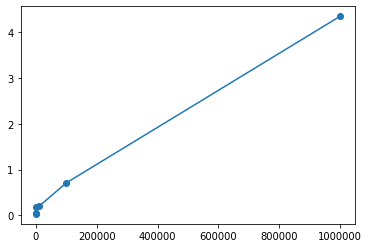

In [37]:
plt.plot(sizes, times, "o-")
plt.ticklabel_format(style='plain')  

Es importante destacar que los datos del ejemplo anterior son artificiales y cumplen todas las hipótesis de K-Means. En el caso peor, K-Means puede llegar a escalar casi de forma cuadrática con el número de muestras.

### MiniBatchKMeans

Mini-batch K-Means es una variante de K-Means que usa mini-batches para reducir el coste computacional, intentando optimizar la misma función objetivo.

Los mini-batches son subconjuntos de los datos de entrada muestreados de forma aleatoria en cada iteración. El algoritmo realiza los siguientes pasos principales:

1. Muestrear $b$ observaciones de forma aleatoria

2. Asignar observaciones al centroide más cercano

3. Para cada muestra, se actualiza su centroide con la media del valor anterior y el de la nueva observación (en cada muestra $b$ se puede actualizar el centroide múltiples veces!)

Esta versión converge más rápido que KMeans, produciendo resultados que son en general ligeramente peores que KMeans estándar. Una comparación se puede ver en la documentación de [scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py):

![](../img/mini_batch_kmeans.png)

Referencia: D. Sculley. [Web-Scale K-Means Clustering](https://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)

In [38]:
from sklearn.cluster import MiniBatchKMeans

times_mb = []
inertia_mb = []
for n in sizes:
    X, _ = make_blobs(n_samples=n, n_features=10, centers=k, cluster_std=0.60, random_state=0)
    start = timer()
    km = MiniBatchKMeans(n_clusters=k).fit(X)
    times_mb.append(timer() - start)
    inertia_mb.append(km.inertia_)

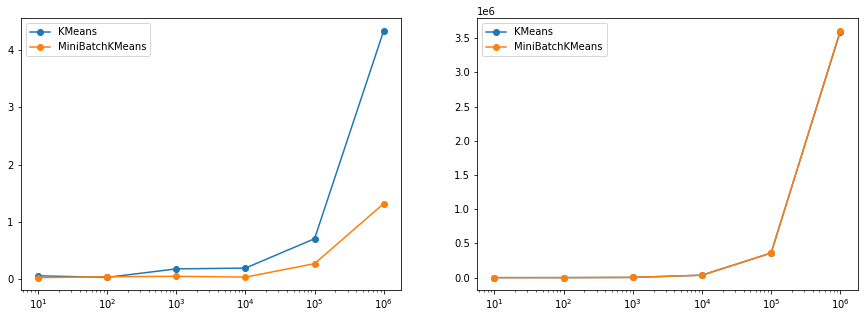

In [39]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(sizes, times, "o-", label="KMeans")
plt.plot(sizes, times_mb, "o-", label="MiniBatchKMeans")
plt.legend()
plt.xscale("log")


plt.subplot(1, 2, 2)
plt.plot(sizes, inertia, "o-", label="KMeans")
plt.plot(sizes, inertia_mb, "o-", label="MiniBatchKMeans")
plt.legend()
plt.xscale("log")

### K-Means out-of-core (libreria dask)

[Dask-ML](https://ml.dask.org/index.html) es una librería que combina distintas aproximaciones para escalar modelos de aprendizaje automático a datos que no caben en memoria, ya sea en varios cores o en un cluster.

En el caso de K-Means, el algoritmo se puede paralelizar de forma natural, que es algo que ya realiza scikit-learn por defecto. Sin embargo, dicha implementación está limitada por el hecho de que todos los datos tienen que estar en la memoria RAM. Dask ofrece una implementación que permite entrenar K-Means con conjuntos de datos más grandes que la capacidad de nuestra RAM.

Además Dask ofrece distintas mejoras sobre la inicialización estándar, diseñadas para funcionar en un entorno distribuido.

Referencia: [Bahman Bahmani, Benjamin Moseley, Andrea Vattani, Ravi Kumar, Sergei Vassilvitskii](https://arxiv.org/abs/1203.6402). Scalable K-Means++

In [40]:
from dask_ml.datasets import make_blobs
from dask_ml.cluster import KMeans

X, y = make_blobs(n_samples=10000000, chunks=1000000, random_state=0, centers=3)
X = X.persist()

In [41]:
%%time 
km = KMeans(n_clusters=3)
km.fit(X)

CPU times: user 2min 22s, sys: 26.3 s, total: 2min 48s
Wall time: 47.2 s


KMeans(n_clusters=3)

## Evaluar calidad de los clusters

Evaluar la calidad de los clusters es un problema complejo, ya que en general no existen unos datos reales con los que comparar. Por tanto existen dos tipos de evaluaciones:

- **Evaluación cualitativa**: requiere uno o varios expertos en el dominio para que saquen conclusiones e interpreten las agrupaciones. A menudo los clusters pueden confirmar intuiciones de los analistas, así como descubrir nuevos patrones no conocidos. 

- **Evaluación cuantitativa**: es muy raro contar con las etiquetas reales, por lo que todas las medidas que las usan suelen ser muy poco prácticas: Rand index, Fowlkes-Mallows scores, información mutua, V-measure, etc. (se puede ver una lista en la documentación de [sklearn](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)). Sin embargo, existen algunas medidas que no necesitan las etiquetas reales:

  - Coeficiente Silhouette
  - Índice Calinski-Harabasz
  - Índice Davies-Bouldin

### Coeficiente Silhouette

Idealmente, una buena agrupación se caracteriza por una distancia intra-cluster pequeña y una distancia inter-cluster grande, es decir, que las observaciones de un mismo clúster estén próximas entre si y los distintos grupos lo más separados posible. Este coeficiente se calcula usando la fórmula

$$s_i = \frac{b_i - a_i}{\max(a_i, b_i)}$$

donde

- $a_i$ es la distancia media intra-cluster, es decir, la media de las distancia entre la muestra $i$ y el resto de observaciones del mismo clúster
- $b_i$ es la distancia mínima entre la muestra $i$ y todas las demás muestras que no pertenecen a su mismo clúster 

Los valores de $s_i$ están entre -1 y 1. Valores cercanos a 0 pueden indicar clústers que solapan. Valores negativos generalmente indican que una muestra está en el cluster equivocado.

La métrica anterior está definida para cada una de las muestras. Para reducirla a un único número generalmente se calcula la media para todas las muestras.

Este coeficiente se puede usar para evaluar distintas agrupaciones, y por tanto también es una alternativa para escoger el valor óptimo de $k$.

Vamos a ver un ejemplo de la documentación de [scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py)

![](../img/kmeans_silhouette_analysis_001.png)
![](../img/kmeans_silhouette_analysis_002.png)
![](../img/kmeans_silhouette_analysis_003.png)
![](../img/kmeans_silhouette_analysis_004.png)
![](../img/kmeans_silhouette_analysis_005.png)

Para calcular el score en scikit-learn existen dos funciones:

 - `silhouette_score`, devuelve la media de los scores para toda las muestras
 - `silhouette_samples`, devuelve el score para cada una de las muestras

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = mall[["Annual Income (k$)", "Spending Score (1-100)"]]
k = 4

km = KMeans(n_clusters=k, random_state=0)
labels = km.fit_predict(X)

sc = silhouette_score(X, labels)
sc_samples = silhouette_samples(X, labels)

In [43]:
sc

0.4931963109249047

In [44]:
sc_samples[1:20]

array([0.29882999, 0.65818325, 0.29618254, 0.38824486, 0.30296064,
       0.66858293, 0.29283314, 0.65180885, 0.30323108, 0.69565421,
       0.24612736, 0.69851842, 0.33991939, 0.69946696, 0.34498336,
       0.50098213, 0.27557896, 0.60362354, 0.24134722])

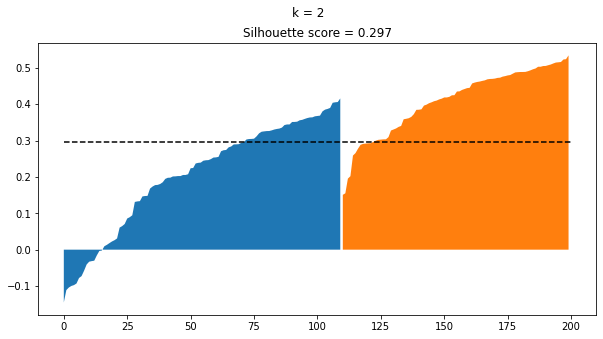

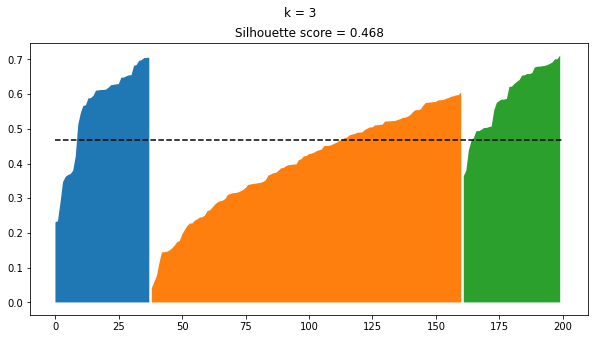

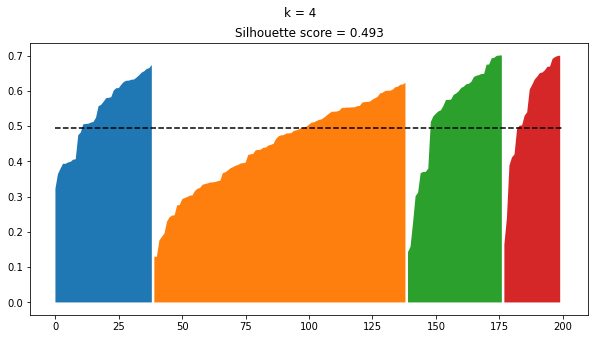

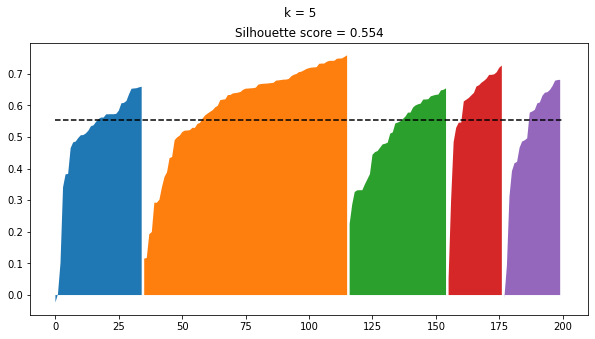

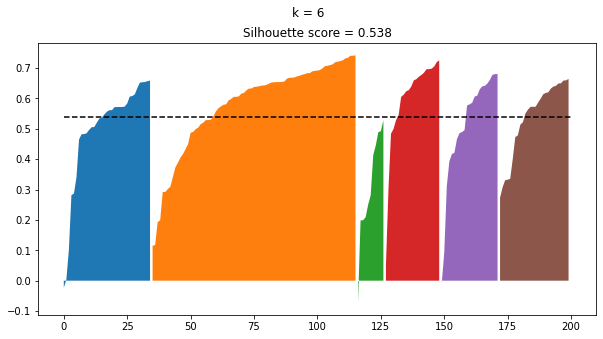

In [45]:
import matplotlib.cm as cm

X = mall[["Annual Income (k$)", "Spending Score (1-100)"]]
k_list = range(2, 7)

viridis = cm.get_cmap('viridis', len(k_list))

# Para cada valor de k, realizamos el análisis de silueta
for k in k_list:
    km = KMeans(n_clusters=k, random_state=0)
    labels = km.fit_predict(X)

    sc = silhouette_score(X, labels)
    sc_samples = silhouette_samples(X, labels)
    
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"k = {k}")
    plt.title(f"Silhouette score = {sc:.3f}")
    plt.hlines(sc, 0, X.shape[0], colors="black", linestyle="dashed")
    
    # Para cada cluster pintamos el valor del coeficiente de las muestras
    # como un area, ordenado de menor a mayor
    y_lower = 0
    for i in range(k):
        sc_i = sc_samples[labels == i]
        sc_i.sort()
        
        y_upper = y_lower + sc_i.shape[0]
        plt.fill_between(np.arange(y_lower, y_upper), 0, sc_i)
        
        y_lower = y_upper

### Otros coeficientes

scikit-learn también implementa otros coeficientes que no necesitan de las etiquetas reales:

- `calinsky_harabasz_score`
- `davies_bouldin_score`

En general son similares al coeficiente Silhouette, pero no están acotados superiormente. El valor más pequeño es 0 y valores más grandes indican mejores agrupaciones.

Estos índices, al igual que el coeficiente *Silhouette*, se pueden usar para seleccionar el número óptimo de clusters. Una comparación con datos simulados se puede ver en [Tibshirani et al. (2001). Estimating the number of clusters in a data ser via the gap statistic](https://statweb.stanford.edu/~gwalther/gap)

Todas las medidas se pueden usar para medir la calidad de las agrupaciones resultantes de K-Means o cualquier otro algoritmo. Sin embargo, al estar basados en distancias todos presentan la desventaja de que tienden a ser más altos para clústeres convexos que para otros tipos de clustering basados en densidades, como DBSCAN. Por tanto no se suelen usar para comparar agrupaciones resultantes de distintos algoritmos.

Una buena revisión de los distintos índices se puede encontrar en [Halkidi et al. (2001). On Clustering Validation Techniques](https://web.itu.edu.tr/sgunduz/courses/verimaden/paper/validity_survey.pdf)

### Ejercicios

Usando el conjunto de datos de [transacciones con tarjetas de crédito](https://www.kaggle.com/arjunbhasin2013/ccdata):

1. Cargar el conjunto de datos

2. Comprobar si existen valores que faltan y diseñar una estrategia

3. Escalar los datos a media 0 y varianza 1

4. Utilizar un análisis del coeficiente de silueta para decidir el número de grupos

5. Realizar un análisis de clustering con el valor de $k$ del punto anterior

6. Visualiza las distintas agrupaciones usando un gráfico de radar

## Resumen

K-Means es uno de los algoritmos más usados de clusterización. En general, proporciona buenos resultados en distintos tipos de datos y es bastante eficiente, incluso con millones de observaciones.

Sin embargo, hay que tener cuidado a la hora de interpretar los resultados, ya que es un método no-supervisado y no hay forma de saber si las agrupaciones son "correctas" o no.

En este sentido, a la hora de usarlo en la práctica es importante recordar una serie de cuestiones:
- En general es importante escalar/estandarizar los datos para que todas las variables tengan el mismo peso, a no ser que exista algún motivo por el que algunas debieran tener más peso en las agrupaciones
- Los métodos para seleccionar el número de clústeres son heurísticas, y a menudo proporcionan resultados contraditorios entre si
- K-means da más peso a los clústeres más grandes
- K-means asume clústeres esféricos, y no funciona bien cuando las agrupaciones tienen otras formas (por ejemplo clústeres elípticos)
- Si hay solapamiento entre clústeres K-Means no tiene ninguna noción de incertidumbre. Una observación va a estar asociada a un único clúster
- K-means siempre va a agrupar los datos en el número de clústeres indicado, incluso cuando los datos no presentan ningún patrón natural. Además, todas las observaciones se asignan a un grupo (K-Means no detecta si las observaciones no deberían de pertenecer a ningún clúster)